In [1]:
# READING IMAGE #
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
# %matplotlib qt


In [ ]:
#Undistort-Perspective Transform-Warp
class UPTW(object):
    def __init__(self,image,src,dst):
        self.image = image
        self.src = src
        self.dst = dst
    def region_of_interest(self, vertices):
        #defining a blank mask to start with
        mask = np.zeros_like(self.image)
        shape = self.image.shape
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
        if len(shape) > 2:
            channel_count = shape[2]  # i.e. 3 or 4 depending on your image
            ignore_mask_color = (255,) * channel_count
        else:
            ignore_mask_color = 255
        
        #filling pixels inside the polygon defined by "vertices" with the fill color    
        cv2.fillPoly(mask, vertices, ignore_mask_color)

        #returning the image only where mask pixels are nonzero
        self.masked_image = cv2.bitwise_and(self.image, mask)
        return self.masked_image
    
    #Convert to gray and Undistort Image
    def undistort(image, objpoints, imgpoints):
    #     image = mpimg.imread(image)
        gray = graycvt(image)
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)
        undist = cv2.undistort(image,mtx,dist,None,mtx)
        return undist
        

In [46]:
class processing(object):
    def __init__(self,image):
        self.image = image
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_RGB2GRAY)
    
    def grad(self,orient = 'x', k_size = 3, thresh = (0,255)):
        if orient == 'x':
            sobel_x = cv2.Sobel(self.gray,cv2.CV_64F,1,0,ksize = k_size)
            abs_sobel = np.absolute(sobel_x)
        elif orient == 'y':
            sobel_y = cv2.Sobel(self.gray,cv2.CV_64F,0,1,ksize = k_size)
            abs_sobel = np.absolute(sobel_y)
        scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
        self.grad = np.zeros_like(scaled_sobel)
        self.grad[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
        return self.grad  

    def hsv(self, thresh= (0,255)):
        hsv = cv2.cvtColor(self.image,cv2.COLOR_RGB2HSV)
        v = hsv[:,:,2]
        self.v_binary = np.zeros_like(v)
        self.v_binary[(v>thresh[0]) & (v<=thresh[1])] = 1
        return self.v_binary 

    def hls(self, thresh= (0,255)):
        hls = cv2.cvtColor(self.image,cv2.COLOR_RGB2HLS)
        s = hls[:,:,2]
        self.s_binary = np.zeros_like(s)
        self.s_binary[(s>thresh[0]) & (s<=thresh[1])] = 1
        return self.s_binary 

    def combined_binary(self):
        self.combined_binary = np.zeros_like(self.grad)
        self.combined_binary[(self.grad == 1)|(self.s_binary==1)&(self.v_binary == 1)]=1
        return self.combined_binary

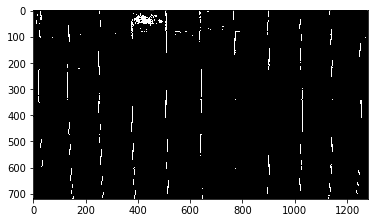

In [47]:
image1 = mpimg.imread('./camera_cal/calibration1.jpg')
image2 = mpimg.imread('./camera_cal/calibration2.jpg')
process = processing(image1)
process.grad(k_size = 9, thresh=(30,100))
process.hsv(thresh=(75,255))
process.hls(thresh=(120,255))
# grad = process.grad(thresh=(77,130))
# combined_binary = np.zeros_like(grad)
# combined_binary[(grad == 1)] = 1
plt.imshow(process.combined_binary(),cmap='gray')
# f, (ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
# f.tight_layout()
# # ax1.imshow(process.combined_binary(), cmap='gray')
# ax2.imshow(process.hsv(), cmap='gray')
# plt.subplots_adjust(left=0.,right=1,top=0.9,bottom=0.)
# print(image1.shape)